In [102]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [103]:
pre_p = '/mnt/volume1/T2D/EMR-data2/'
Cholesterol_file_p = pre_p+'Cholesterol.csv'
BP_file_p = pre_p+'BP.csv'
glucose_p = pre_p+'Glucose.csv'
FamilyHist_file_p = pre_p+'FamilyHist.csv'
#OralGlucose_file_p = pre_p+'OralGlucose.csv'
PatPopulation_file_p = pre_p+'PatPopulation.csv'
Vitals_file_p = pre_p+'Vitals.csv'
genome_header = '/mnt/volume1/T2D/header.txt'
output = '/mnt/volume1/T2D/cleanData/feature_max.csv'

In [104]:
Cholesterol_pd = pd.read_csv(Cholesterol_file_p, sep=',')
BP_pd = pd.read_csv(BP_file_p, sep=',')
glucose_pd = pd.read_csv(glucose_p, sep=',')
FamilyHist_pd = pd.read_csv(FamilyHist_file_p, sep=',')
#OralGlucose_pd = pd.read_csv(OralGlucose_file_p, sep=',')
PatPopulation_pd = pd.read_csv(PatPopulation_file_p, sep=',')
Vitals_pd = pd.read_csv(Vitals_file_p, sep=',')



In [105]:
def read_header(ps_folder):
    data_arr = []

    with open(ps_folder, 'r') as f:

        lines = f.readlines()

        for line in lines:

            if line != '\n':
                items = line.split(sep='\t')
                data_arr.extend(items)
            else:
                break

    print("--------------------------------")

    return data_arr

In [106]:
#genome_header_pd = pd.read_csv(genome_header, sep='\t', header=None)
head_list = read_header(genome_header)
head_pd = pd.DataFrame(head_list)
head_pd.shape

--------------------------------


In [158]:
head_pd.shape

(3910, 1)

In [107]:
head_pd.head()

,0
0,MGVKKNZN
1,MNADOVKN
2,MNAODHZZ
3,MNAOGDAK
4,MNATONVG


In [108]:
Cholesterol_pd.shape,BP_pd.shape,glucose_pd.shape,FamilyHist_pd.shape,PatPopulation_pd.shape,Vitals_pd.shape

((5532, 5), (6157, 5), (5693, 3), (3222, 3), (6212, 5), (2911, 7))

In [109]:
len(pd.Series(Cholesterol_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

5532

In [110]:
len(pd.Series(BP_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

6157

In [111]:
len(pd.Series(glucose_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

5693

In [112]:
len(glucose_pd)

5693

In [113]:
len(pd.Series(FamilyHist_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

3222

In [114]:
#len(pd.Series(OralGlucose_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

In [115]:
len(pd.Series(PatPopulation_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

6212

In [116]:
len(pd.Series(Vitals_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

2911

In [117]:
Vitals_pd = Vitals_pd[['Deidentified_Pat_ID','Weight','Height','BMI']]

In [118]:
Vitals_pd.head()

,Deidentified_Pat_ID,Weight,Height,BMI
0,MGVKKNZN,2320.0,23.41,66.000
1,MGVNDNAK,2896.0,23.89,73.000
2,MNANZAKG,3219.2,31.62,66.890
3,MNAOGDAK,3376.0,29.44,70.984
4,MNAZGATG,3340.8,29.13,71.000


In [119]:

res = pd.merge(Vitals_pd,PatPopulation_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.shape

(6212, 8)

In [120]:
FamilyHist_pd.head()

,Deidentified_Pat_ID,Family History,type
0,MGVNDNAK,Diabetes,3
1,MNADDANN,Diabetes Type 1,1
2,MNADZOHA,Diabetes,3
3,MNANKNAN,Diabetes Type 2,2
4,MNATONVG,Diabetes,3


In [121]:
FamilyHist_pd = FamilyHist_pd[['Deidentified_Pat_ID','type']]
FamilyHist_pd.columns = ['Deidentified_Pat_ID','family_diabetes_type']
res = pd.merge(res,FamilyHist_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

,Deidentified_Pat_ID,Weight,Height,BMI,gender,age,ethnicity,race,family_diabetes_type
0,MGVKKNZN,2320.0,23.41,66.000,0,60,3,7,NaN
1,MGVNDNAK,2896.0,23.89,73.000,0,51,3,7,3.0
2,MNANZAKG,3219.2,31.62,66.890,0,38,3,7,NaN
3,MNAOGDAK,3376.0,29.44,70.984,0,41,3,7,NaN
4,MNAZGATG,3340.8,29.13,71.000,0,67,3,7,NaN


In [122]:
res.shape

(6212, 9)

In [123]:
BP_pd.head()

,Deidentified_Pat_ID,BP,RecordedYear,bp_high,bp_low
0,MGVKKNZN,120/78,2018,120,78
1,MGVNDNAK,102/66,2019,102,66
2,MNAAOKVG,136/80,2017,136,80
3,MNADDANN,134/98,2017,134,98
4,MNADOVKN,139/95,2016,139,95


In [124]:
BP_pd = BP_pd[['Deidentified_Pat_ID','bp_high', 'bp_low']]

res = pd.merge(res,BP_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

,Deidentified_Pat_ID,Weight,Height,BMI,gender,age,ethnicity,race,family_diabetes_type,bp_high,bp_low
0,MGVKKNZN,2320.0,23.41,66.000,0,60,3,7,NaN,120.0,78.0
1,MGVNDNAK,2896.0,23.89,73.000,0,51,3,7,3.0,102.0,66.0
2,MNANZAKG,3219.2,31.62,66.890,0,38,3,7,NaN,150.0,84.0
3,MNAOGDAK,3376.0,29.44,70.984,0,41,3,7,NaN,156.0,104.0
4,MNAZGATG,3340.8,29.13,71.000,0,67,3,7,NaN,128.0,84.0


In [125]:
res.shape

(6212, 11)

In [126]:
Cholesterol_pd.head()

,Deidentified_Pat_ID,triglyceride,ldl,hdl,a1c
0,ZNODZHKT,20.0,109.0,74.0,NaN
1,ZHOHTGGV,23.0,19.0,33.0,5.7
2,ZDVZZVDT,24.0,123.0,75.0,NaN
3,ZDHVKTZT,26.0,85.0,65.0,NaN
4,ZDNVNAN,26.0,59.0,51.0,NaN


In [127]:
res = pd.merge(res,Cholesterol_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()


,Deidentified_Pat_ID,Weight,Height,BMI,gender,age,ethnicity,race,family_diabetes_type,bp_high,bp_low,triglyceride,ldl,hdl,a1c
0,MGVKKNZN,2320.0,23.41,66.000,0,60,3,7,NaN,120.0,78.0,NaN,NaN,NaN,NaN
1,MGVNDNAK,2896.0,23.89,73.000,0,51,3,7,3.0,102.0,66.0,78.0,119.0,69.0,5.3
2,MNANZAKG,3219.2,31.62,66.890,0,38,3,7,NaN,150.0,84.0,118.0,118.0,44.0,NaN
3,MNAOGDAK,3376.0,29.44,70.984,0,41,3,7,NaN,156.0,104.0,111.0,123.0,35.0,NaN
4,MNAZGATG,3340.8,29.13,71.000,0,67,3,7,NaN,128.0,84.0,121.0,75.0,38.0,NaN


In [128]:
res.shape

(6212, 15)

In [129]:
res = pd.merge(res,glucose_pd, how='outer',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

,Deidentified_Pat_ID,Weight,Height,BMI,gender,age,ethnicity,race,family_diabetes_type,bp_high,bp_low,triglyceride,ldl,hdl,a1c,gulcose,Fasting?
0,MGVKKNZN,2320.0,23.41,66.000,0,60,3,7,NaN,120.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN
1,MGVNDNAK,2896.0,23.89,73.000,0,51,3,7,3.0,102.0,66.0,78.0,119.0,69.0,5.3,94.0,NaN
2,MNANZAKG,3219.2,31.62,66.890,0,38,3,7,NaN,150.0,84.0,118.0,118.0,44.0,NaN,96.0,No
3,MNAOGDAK,3376.0,29.44,70.984,0,41,3,7,NaN,156.0,104.0,111.0,123.0,35.0,NaN,108.0,NaN
4,MNAZGATG,3340.8,29.13,71.000,0,67,3,7,NaN,128.0,84.0,121.0,75.0,38.0,NaN,NaN,NaN


In [130]:
res.shape

(6212, 17)

In [131]:
res.describe()

,Weight,Height,BMI,gender,age,ethnicity,race,family_diabetes_type,bp_high,bp_low,triglyceride,ldl,hdl,a1c,gulcose
count,2429.000000,2415.000000,2911.000000,6212.000000,6212.000000,6212.000000,6212.000000,3222.000000,6157.000000,6157.000000,5468.000000,5373.000000,5466.000000,2287.000000,5693.000000
mean,3056.542577,29.680232,67.015456,0.607051,54.553928,2.943818,6.911301,2.941030,144.162742,82.390775,166.619422,122.790955,58.540505,6.367381,117.705270
std,726.204867,6.230362,3.742598,0.488445,15.343955,0.449224,0.760704,0.266519,18.551480,11.594975,155.916396,35.991479,17.718897,1.547652,33.343363
min,1458.000000,14.620000,57.000000,0.000000,18.000000,-1.000000,-1.000000,1.000000,90.000000,8.000000,20.000000,10.000000,15.000000,3.700000,55.000000
25%,2518.400000,25.325000,64.016000,0.000000,42.000000,3.000000,7.000000,3.000000,131.000000,74.000000,93.000000,97.000000,46.000000,5.400000,98.000000
50%,2992.000000,28.780000,66.750000,1.000000,56.000000,3.000000,7.000000,3.000000,140.000000,82.000000,138.000000,120.000000,56.000000,5.800000,106.000000
75%,3488.000000,33.050000,69.665500,1.000000,67.000000,3.000000,7.000000,3.000000,156.000000,90.000000,199.000000,144.000000,68.000000,6.700000,124.000000
max,7096.000000,65.730000,79.500000,1.000000,90.000000,3.000000,12.000000,4.000000,228.000000,148.000000,6163.000000,370.000000,166.000000,16.000000,249.000000


In [132]:
len(res[res['gulcose'].notna()]), len(res[res['Fasting?'].notna()])

(5693, 3560)

In [133]:
len(res), len(head_pd)

(6212, 3910)

In [134]:
head_pd.columns = ['Deidentified_Pat_ID']

In [135]:
head_pd.head()

,Deidentified_Pat_ID
0,MGVKKNZN
1,MNADOVKN
2,MNAODHZZ
3,MNAOGDAK
4,MNATONVG


In [136]:
res = pd.merge(res,head_pd, how='right',on=['Deidentified_Pat_ID'])
#res = res[[ 'Deidentified_Pat_ID', 'triglyceride','ldl', 'hdl','a1c']]
res.head()

,Deidentified_Pat_ID,Weight,Height,BMI,gender,age,ethnicity,race,family_diabetes_type,bp_high,bp_low,triglyceride,ldl,hdl,a1c,gulcose,Fasting?
0,MGVKKNZN,2320.0,23.41,66.000,0.0,60.0,3.0,7.0,NaN,120.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN
1,MNAOGDAK,3376.0,29.44,70.984,0.0,41.0,3.0,7.0,NaN,156.0,104.0,111.0,123.0,35.0,NaN,108.0,NaN
2,MNAZGATG,3340.8,29.13,71.000,0.0,67.0,3.0,7.0,NaN,128.0,84.0,121.0,75.0,38.0,NaN,NaN,NaN
3,MNGDNAOA,4268.8,43.08,66.000,1.0,55.0,3.0,7.0,NaN,152.0,80.0,100.0,108.0,59.0,NaN,99.0,NaN
4,MNGGAADT,3539.2,30.86,71.000,0.0,62.0,3.0,7.0,NaN,152.0,101.0,127.0,90.0,60.0,5.8,112.0,No


In [150]:
res.shape

(3910, 17)

In [138]:
res.describe()

,Weight,Height,BMI,gender,age,ethnicity,race,family_diabetes_type,bp_high,bp_low,triglyceride,ldl,hdl,a1c,gulcose
count,1535.000000,1530.000000,1831.000000,3909.000000,3909.000000,3909.000000,3909.000000,2026.000000,3880.000000,3880.000000,3504.000000,3445.000000,3502.000000,1452.000000,3619.000000
mean,3032.718958,29.455307,66.962376,0.598619,55.402661,2.944743,6.912254,2.947680,144.436856,82.413144,165.351027,122.187170,58.601770,6.405510,118.490743
std,705.606040,5.907708,3.783876,0.490241,15.228507,0.450197,0.768977,0.249893,18.618118,11.649194,135.801132,35.520014,17.483198,1.552943,33.809903
min,1458.000000,17.230000,57.000000,0.000000,19.000000,-1.000000,-1.000000,1.000000,90.000000,8.000000,23.000000,10.000000,15.000000,3.700000,56.000000
25%,2512.000000,25.270000,64.000000,0.000000,43.000000,3.000000,7.000000,3.000000,132.000000,74.000000,93.750000,97.000000,46.000000,5.400000,98.000000
50%,2976.000000,28.670000,66.535000,1.000000,57.000000,3.000000,7.000000,3.000000,140.000000,82.000000,138.000000,120.000000,56.000000,5.800000,107.000000
75%,3456.000000,32.627500,69.500000,1.000000,68.000000,3.000000,7.000000,3.000000,156.000000,89.000000,198.000000,144.000000,69.000000,6.825000,125.000000
max,6348.800000,65.730000,79.000000,1.000000,90.000000,3.000000,12.000000,4.000000,226.000000,148.000000,2776.000000,370.000000,166.000000,16.000000,249.000000


In [151]:
len(res[res['a1c']>5.7])

796

In [152]:
len(res[res['a1c']<=5.7])

656

In [153]:
# determine the threshold for missing values
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(res)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('a1c', 62.86),
 ('Height', 60.87),
 ('Weight', 60.74),
 ('BMI', 53.17),
 ('family_diabetes_type', 48.18),
 ('Fasting?', 42.61),
 ('ldl', 11.89),
 ('hdl', 10.43),
 ('triglyceride', 10.38),
 ('gulcose', 7.44)]

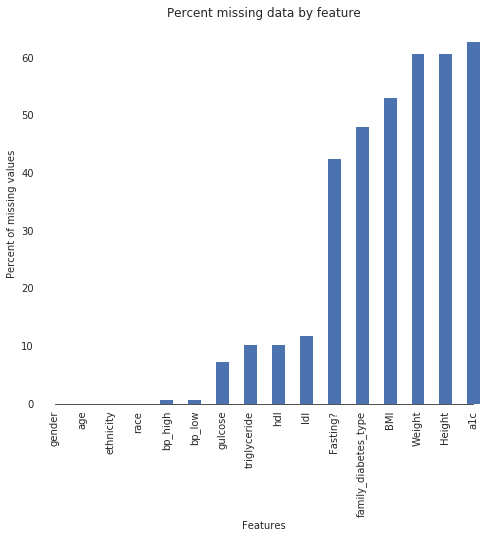

In [154]:
# Visualize missing values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(res.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

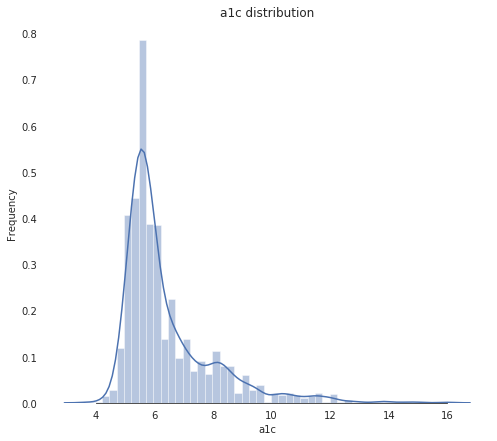

In [155]:
feature_name = 'a1c'
res_bp = res[res[feature_name].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(res_bp[feature_name], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel=feature_name)
ax.set(title=feature_name+ " distribution")
sns.despine(trim=True, left=True)
plt.show()

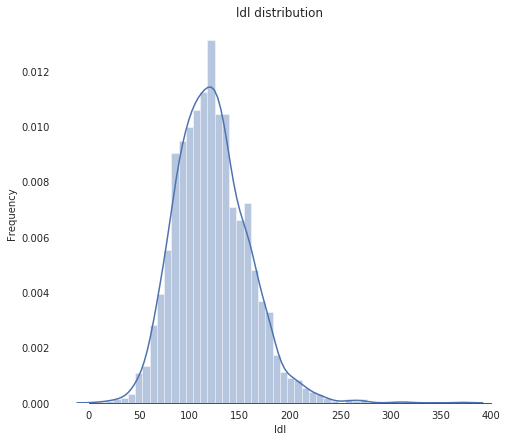

In [156]:
feature_name = 'ldl'
res_bp = res[res[feature_name].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(res_bp[feature_name], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel=feature_name)
ax.set(title=feature_name+ " distribution")
sns.despine(trim=True, left=True)
plt.show()

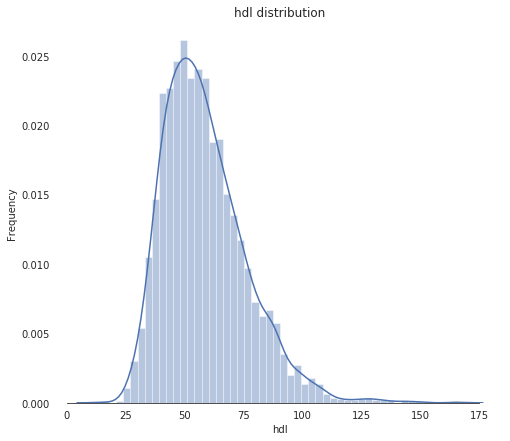

In [146]:
feature_name = 'hdl'
res_bp = res[res[feature_name].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(res_bp[feature_name], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel=feature_name)
ax.set(title=feature_name+ " distribution")
sns.despine(trim=True, left=True)
plt.show()

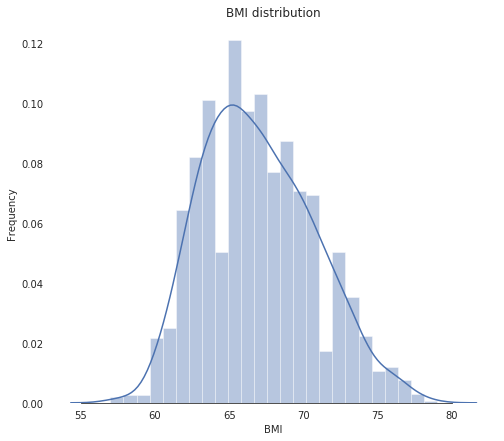

In [147]:
res_bp = res[res['BMI'].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(res_bp['BMI'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="BMI")
ax.set(title="BMI distribution")
sns.despine(trim=True, left=True)
plt.show()

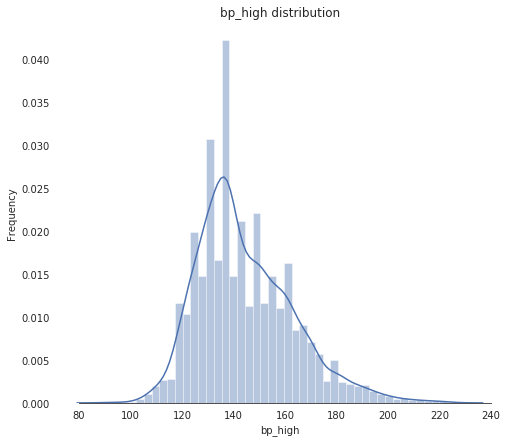

In [148]:
res_bp = res[res['bp_high'].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(res_bp['bp_high'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="bp_high")
ax.set(title="bp_high distribution")
sns.despine(trim=True, left=True)
plt.show()

In [157]:
res.to_csv(output, index=False)